# Webscrapping all the financial stability reports from the EBC

In [ ]:
import os
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = "https://www.ecb.europa.eu/pub/financial-stability/fsr/html/all_releases.en.html"

#If there is no such folder, the script will create one automatically
folder_location = r'D:\ECB_financial-stability' # specify your directory to save the downloaded reports
if not os.path.exists(folder_location):os.mkdir(folder_location)

response = requests.get(url)
print(response)
soup= BeautifulSoup(response.text, "html.parser")     
for link in soup.select("a[href$='.pdf']"):
    #Name the pdf files using the last portion of each link which are unique in this case
    filename = os.path.join(folder_location,link['href'].split('/')[-1])
    with open(filename, 'wb') as f:
        f.write(requests.get(urljoin(url,link['href'])).content)

<Response [200]>


* Requirements:

In [ ]:
pip install wordcloud


In [ ]:
pip install PyPDF2


In [ ]:
pip install nltk


In [ ]:
pip install matplotlib

# WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Written D:\ECB_financial-stability\wordcloud.png


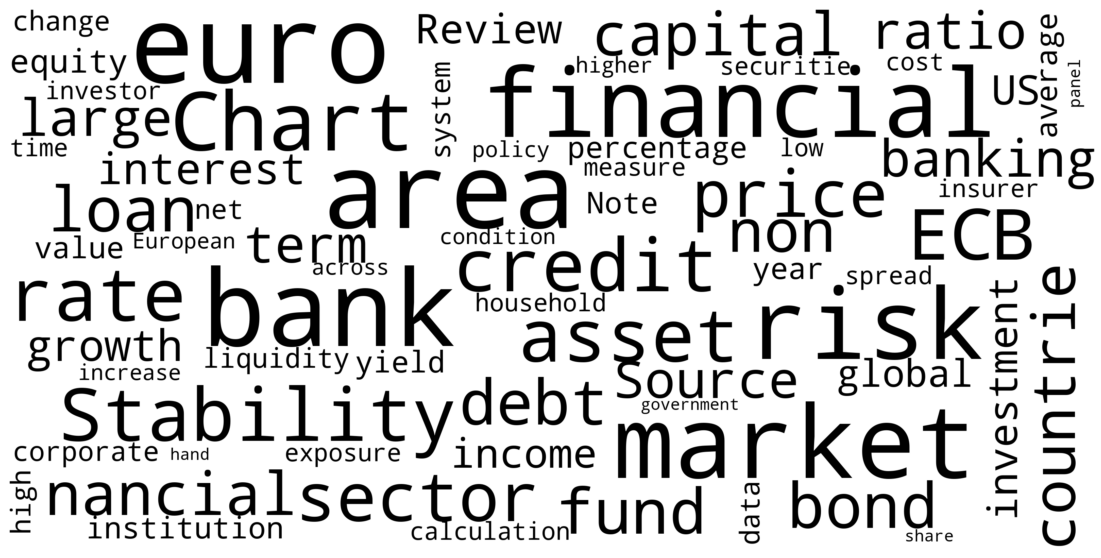

In [ ]:
import string
import re
import glob
import matplotlib.pyplot as plt
import wordcloud
import PyPDF2
import nltk
from calendar import month_name
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



ENGLISH_STOP = set(stopwords.words('english')) # Some 'stop' words in english (words that shouldn't be considered in the wordcloud)

class research_wordcloud():
    '''
    Make word cloud from all PDF under a folder

    Usage:
    rs = research(paper_path)
    rs.extract_text()
    rs.filter_text()
    rs.generate_wordcloud(figurename)
    '''
    def __init__(self, paper_path):
        '''
        find all pdf under paper_path
        '''
        self.paper_path = paper_path
        self.PDFs = glob.glob(paper_path + '/*pdf') #any PDF can be found?
        self.texts = ''  # store all texts
        self.tokens = None
        self.words = None
        self.paper_stop = ['figure','supplementary', 'author','press',
                          'Central Bank','additional', 'additionalfile', 'Report', 'billion', 'quarter',
                          'month', 'total','level','economic', 'due', 'end','year', 'million', 
                          'previous',  'important', 'last', 'scenario', 'period','assumption','twelve', 'year',
                           'level', 'Brazilian','third','quarter', 'one','month', 'first', 'baseline','breakdown','determinant'] 
                           # here, you specify the vector of words that shouldn't be considered
        months = [month_name[i].lower() for i in range(1,13)]
        self.paper_stop.extend(months)
        self.paper_stop.extend(list(map(lambda x: x.capitalize(), self.paper_stop)))
        self.paper_stop = set(self.paper_stop)

    def extract_text(self):
        '''
        read pdf text
        '''
        for pdf in self.PDFs:
            with open(pdf, 'rb') as paper:
                pdf = PyPDF2.PdfFileReader(paper)
                for page_num in range(pdf.getNumPages()-1): #skip reference
                    page = pdf.getPage(page_num)
                    self.texts += page.extractText()

    def filter_text(self):
        '''
        remove stop words and punctuations
        '''
        self.tokens = nltk.word_tokenize(self.texts)
        self.tokens =  nltk.pos_tag(self.tokens) #(tag the nature of each word, verb? noun?)

        self.words = []
        num_regex = re.compile('[0-9]+')
        for word, tag in self.tokens:
            IS_VERB = tag.startswith('V')
            IS_STOP = word in set(string.punctuation)
            IS_ENGLISH_STOP = word in set(ENGLISH_STOP)
            IS_WORDCLOUD_STOP = word in wordcloud.STOPWORDS
            IS_NUMBER = num_regex.search(word)
            IS_PAPER_STOP = word in self.paper_stop
            condition = [IS_VERB, IS_STOP, IS_ENGLISH_STOP,
                        IS_WORDCLOUD_STOP, IS_NUMBER, IS_PAPER_STOP]
            if not any(condition):
                if word == "coli":
                    self.words.append('E. coli') 
                else:
                    self.words.append(word)

        self.words = ' '.join(self.words)

    
    
    
    def generate_wordcloud(self, figurename):
        '''
        plot
        '''
        
    
#create the wordcloud object

        wc = wordcloud.WordCloud(  
                collocations=False,
                background_color='white',
                #max_words=200,
                max_words=70, # maximium number of words
                max_font_size=40, 
                scale=8 ,
                color_func= lambda *args, **kwargs: "black"
                #width=800, 
                #height=800 
        )
        try:
            wc.generate(self.words)
            plt.figure(figsize=(20,10))
            plt.imshow(wc, interpolation="bilinear")
            plt.axis('off')
            #plt.tight_layout()
            plt.savefig(figurename, bbox_inches='tight', transparent=True, dip = 100)
            print('Written %s' %figurename)
        except ValueError:
            print(self.words)





PDF_path = 'D:\ECB_financial-stability' # the path where the downloaded reports are
wordcloud_image = 'D:\ECB_financial-stability\wordcloud.png' # saving the wordcloud as png 
wc = research_wordcloud(PDF_path)
wc.extract_text()
wc.filter_text()
wc.generate_wordcloud(wordcloud_image)